## Comparing Regressors on the Advertising Data Set

In [25]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.utils import check_array, check_X_y
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import cross_val_score, train_test_split

### Meshgrid and Contour Plots

(40, 50) (40, 50)


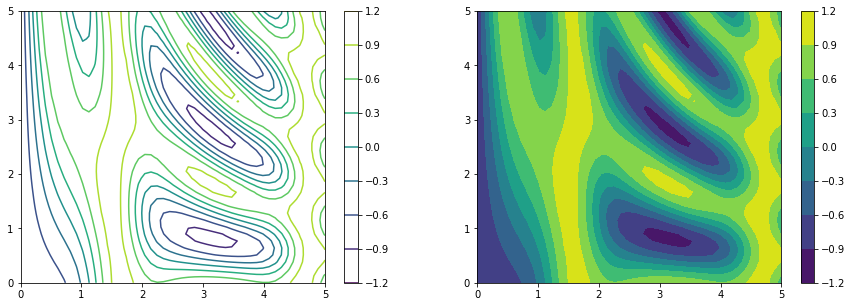

In [27]:
def f(u, v):
    return np.sin(u) ** 10 + np.cos(10 + v * u) * np.cos(u)

u = np.linspace(0, 5, 50)
v = np.linspace(0, 5, 40)

U, V = np.meshgrid(u, v)
print(U.shape, V.shape)
W = f(U, V)

fig, [a0, a1] = plt.subplots(1, 2, figsize=(15, 5))

c0 = a0.contour(U, V, W)
plt.colorbar(c0, ax=a0)

c1 = a1.contourf(U, V, W)
plt.colorbar(c1, ax=a1)

In [23]:
np.random.seed(664)

df = pd.read_csv("Advertising.csv")

X = df[["TV", "radio"]].values
y = df["sales"].values
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [26]:
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)

print(X_tr.shape, X_te.shape, y_tr.shape, y_te.shape)

(160, 2) (40, 2) (160,) (40,)


### $k$-Nearest Neighbors Fit

k_opt = 3
mse_te = 0.99
(50, 50, 2)


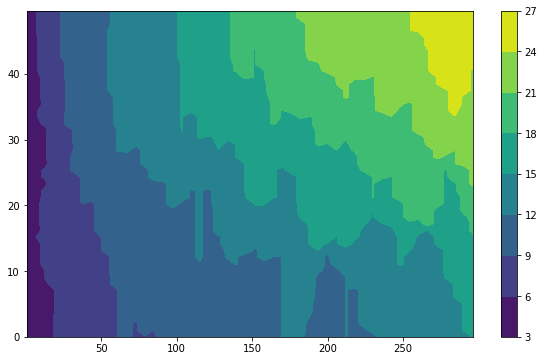

In [81]:
scores = []
ks = np.arange(1, 10)
for k in ks:
    M = KNeighborsRegressor(n_neighbors=k)
    score = np.mean(-cross_val_score(M, X_tr, y_tr, cv=5, scoring="neg_mean_squared_error"))
    scores.append(score)

k_opt = ks[np.argmin(scores)]
print(f"k_opt = {k_opt}")

M = KNeighborsRegressor(n_neighbors=k_opt)
M.fit(X_tr, y_tr)
y_pr = M.predict(X_te)
mse_te = np.mean(np.square(y_pr - y_te))
print(f"mse_te = {mse_te:.2}")

xmin = X.min(axis=0)
xmax = X.max(axis=0)
u = np.linspace(xmin[0], xmax[0], 50)
v = np.linspace(xmin[1], xmax[1], 50)

U, V = np.meshgrid(u, v)
UV = np.stack([U, V], axis=-1)
print(UV.shape)
W = np.zeros_like(U)

for j in range(50):
    W[:, j] = M.predict(UV[:, j, :])

plt.figure(figsize=(10, 6))    
c = plt.contourf(U, V, W)
plt.colorbar(c);

### Kernel Regression Fit

In [67]:
class KernelRegressor(BaseEstimator, RegressorMixin):
    def __init__(self, K=None, h=None):
        if K is None:
            raise Exception("K cannot be None.")
        if h is None:
            raise Exception("h cannot be None.")        
        self.K = K
        self.h = h
        
    def fit(self, X, y):
        _X, _y = check_X_y(X, y)
        self._X = _X
        self._y = _y
    
    def predict(self, X):
        X = check_array(X);
        dists = pairwise_distances(self._X, X)
        K_values = self.K(dists/self.h)
        return np.sum(K_values*self._y.reshape(-1, 1), axis=0)/np.sum(K_values, axis=0)
    
def G(u):
    return np.exp(-np.square(u)/2)/np.sqrt(2*np.pi)

h_opt = 6.399999999999999
test mse = 0.65
(50, 50, 2)


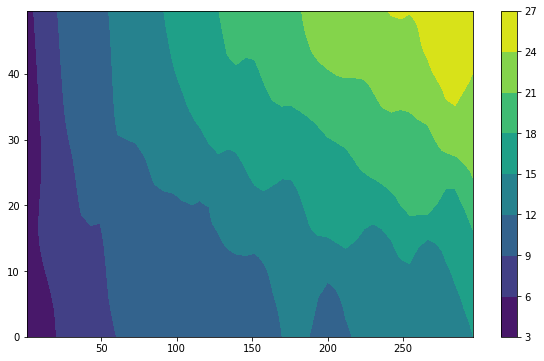

In [80]:
scores = []
hs = np.arange(1, 20, 0.2)
for h in hs:
    M = KernelRegressor(K=G, h=h)
    score = np.mean(-cross_val_score(M, X_tr, y_tr, cv=5, scoring="neg_mean_squared_error"))
    scores.append(score)

h_opt = hs[np.argmin(scores)]
print(f"h_opt = {h_opt}")

M = KernelRegressor(K=G, h=h_opt)
M.fit(X_tr, y_tr)
y_pr = M.predict(X_te)
mse_te = np.mean(np.square(y_pr - y_te))
print(f"mse_te = {mse_te:.2}")

xmin = X.min(axis=0)
xmax = X.max(axis=0)
u = np.linspace(xmin[0], xmax[0], 50)
v = np.linspace(xmin[1], xmax[1], 50)

U, V = np.meshgrid(u, v)
UV = np.stack([U, V], axis=-1)
print(UV.shape)
W = np.zeros_like(U)

for j in range(50):
    W[:, j] = M.predict(UV[:, j, :])

plt.figure(figsize=(10, 6))    
c = plt.contourf(U, V, W)
plt.colorbar(c);